In [1]:
import dgl
import numpy as np
import torch
import networkx as nx
import random
import math

Using backend: pytorch
/home/vijay/anaconda3/envs/ece517/lib/python3.6/site-packages/dgl/base.py:45: DGLWarning: Detected an old version of PyTorch. Suggest using torch>=1.5.0 for the best experience.
  return warnings.warn(message, category=category, stacklevel=1)


In [65]:
def genRandomGraph(
    seed=None,
    num_edges=None,
    num_nodes=None,
    graph_type=None,
    ignore_circular=True
):  
    if seed != None:
        random.seed(seed)

    '''
    if graph_type == None:
        _types = [None, 'star', 'cyclic', 'lollipop']
        graph_type = np.random.choice(_types)
    '''

    print('graph_type: %s'%graph_type)
        
    if num_edges == None or num_nodes == None:
        while ignore_circular:
            # initializations if parameters are None:
            if num_edges == None:
                lower_end_edges = 30
                num_edges = random.randint(lower_end_edges,50)

            if num_nodes == None:
                lower_end_nodes = 20
                num_nodes = random.randint(lower_end_nodes,50)
                
            if num_edges - num_nodes != 0:
                break

    print('num_nodes: %i\nnum_edges: %i'%(num_nodes, num_edges))

    # Generate graph:
    if graph_type == None:
        #return dgl.rand_graph(num_nodes, num_edges)
        return dgl.rand_bipartite("", "", "", num_nodes, num_nodes, num_edges)
    elif graph_type == 'star':
        if num_edges != None:
            print('NOTE: not using num_edges because type set to star')
        G = nx.generators.classic.star_graph(num_nodes)
        return dgl.from_networkx(G)
    elif graph_type == 'cyclic':
        if num_edges != None:
            print('NOTE: not using num_edges because type set to cyclic')
        G = nx.generators.classic.cycle_graph(num_nodes)
        return dgl.from_networkx(G)
    elif graph_type == 'lollipop':
        if num_edges != None:
            print('NOTE: not using num_edges because type set to lollipop')
        tail_length = random.randint(1,20)
        print('tail_length: %i'%tail_length)
        G = nx.generators.classic.lollipop_graph(num_nodes, tail_length)
        return dgl.from_networkx(G)
    else:
        raise Exception('Unsupported entry assigned to graph_type parameter')
    return -1

In [66]:
def vizGraph(G):
    nx_G = G.to_networkx()
    # Kamada-Kawaii layout usually looks pretty for arbitrary graphs
    pos = nx.kamada_kawai_layout(nx_G)
    nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

graph_type: None
num_nodes: 21
num_edges: 33
Graph(num_nodes=21, num_edges=33,
      ndata_schemes={}
      edata_schemes={})


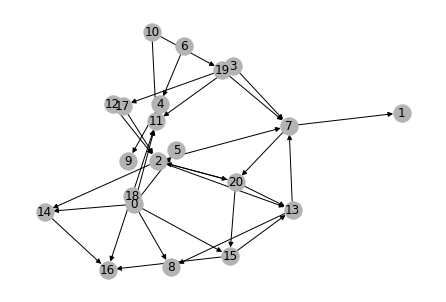

In [73]:
test = genRandomGraph(graph_type=None)
print(test) 
vizGraph(test)